In [1]:
from tqdm.notebook import tqdm
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm

font_name = fm.FontProperties(fname=r"C:\Windows\Fonts\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import time
import random
from tqdm import tqdm_notebook

import folium
from IPython.display import display

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import os
import traceback

- OECD 국가중 꼴등인 한국과 1등인 이스라엘 비교
    - 1. 국가별 최대 육아휴직 기간과 출산율과의 관계
    - 2. 육아 휴직기간 변화율과 출산율 변화율과의 관계
    - 3. OECD 국가 출산율, GDP
    
    - 연령별 출산 데이터
    - 연령별 임신 기간 , 태아의 체중
    - 
    - 기관(돌봄시설, 보육기관 등) 위치
    - 보육기관 폐지 데이터 확보하고 왜 폐지 되었는지 그 지역의 출생아 수 등과 비교할 것
    
    - 출산, 육아관련 휴직 사용, 복귀 데이터
    
    - 산후조리, 돌봄 기관, 등등 알아보기
    
    - 출산을 하지 않는 이유 중 1위는 경제적인 이유
        - 지원 정책이 많은 것으로 보이는데...
            - 지원 금액이 적은지?
            - 지원 방법이 복잡한지?
            - 지원 제도를 잘 모르고 있는지?
    - 반려동물 서비스 증가율
        - 용품점, 택시 등

In [2]:
# pd.read_excel("./data/disabled_of_seoul_2021.xlsx", sheet_name=6, header=[4,5])

In [3]:
og = pd.read_excel("./data/OECD_출산율.xlsx")
# 출산율 2021 / 출산휴가 육아휴직은 2022기준, 첫아이출산나이는 2020기준 /보육바 비율 2021

In [4]:
og.head()

,날짜,대륙,국가,1인당GDP($),출산율,출산휴가(주일),출산휴가급여비율,육아휴직(주일),육아휴직급여비율,첫아이출산나이,보육비비율
0,2021,북아프리카/서아시아,이스라엘,51430,2.97,15.0,100.000000,NaN,NaN,30.510000,11.0
1,2021,라틴아메리카/카리브제도,멕시코,9926,2.06,12.0,100.000000,NaN,NaN,27.105889,NaN
2,2021,북아프리카/서아시아,튀르키예,9587,2.02,16.0,100.000000,NaN,NaN,29.000000,4.0
3,2021,오세아니아,뉴질랜드,48802,1.86,26.0,48.929376,NaN,NaN,30.800000,NaN
4,2021,유럽,프랑스,43519,1.84,16.0,91.413456,26.0,13.498988,30.800000,9.0


In [5]:
del og["날짜"]
# del og["대륙"]
# del og["육아휴직(주일)"]
# del og["육아휴직급여비율"]

In [6]:
og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대륙         38 non-null     object 
 1   국가         38 non-null     object 
 2   1인당GDP($)  38 non-null     int64  
 3   출산율        38 non-null     float64
 4   출산휴가(주일)   38 non-null     float64
 5   출산휴가급여비율   38 non-null     float64
 6   육아휴직(주일)   27 non-null     float64
 7   육아휴직급여비율   28 non-null     float64
 8   첫아이출산나이    38 non-null     float64
 9   보육비비율      33 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.1+ KB


In [7]:
# sns.pairplot(og)

In [8]:
og.head()

,대륙,국가,1인당GDP($),출산율,출산휴가(주일),출산휴가급여비율,육아휴직(주일),육아휴직급여비율,첫아이출산나이,보육비비율
0,북아프리카/서아시아,이스라엘,51430,2.97,15.0,100.000000,NaN,NaN,30.510000,11.0
1,라틴아메리카/카리브제도,멕시코,9926,2.06,12.0,100.000000,NaN,NaN,27.105889,NaN
2,북아프리카/서아시아,튀르키예,9587,2.02,16.0,100.000000,NaN,NaN,29.000000,4.0
3,오세아니아,뉴질랜드,48802,1.86,26.0,48.929376,NaN,NaN,30.800000,NaN
4,유럽,프랑스,43519,1.84,16.0,91.413456,26.0,13.498988,30.800000,9.0


In [9]:
og.tail()

,대륙,국가,1인당GDP($),출산율,출산휴가(주일),출산휴가급여비율,육아휴직(주일),육아휴직급여비율,첫아이출산나이,보육비비율
33,동아시아/동남아시아,일본,39285,1.36,14.000000,67.000000,44.000000,59.935065,32.00,7.0
34,유럽,포르투갈,24262,1.33,6.000000,100.000000,24.140000,59.610605,31.60,5.0
35,유럽,이탈리아,35551,1.30,21.700000,80.000000,26.000000,30.000000,32.20,0.0
36,유럽,그리스,20277,1.27,43.000000,65.080782,8.666666,42.248985,31.70,6.0
37,동아시아/동남아시아,대한민국,34758,1.08,12.857143,83.680278,52.000000,44.648459,33.13,5.0


In [10]:
og

,대륙,국가,1인당GDP($),출산율,출산휴가(주일),출산휴가급여비율,육아휴직(주일),육아휴직급여비율,첫아이출산나이,보육비비율
0,북아프리카/서아시아,이스라엘,51430,2.97,15.000000,100.000000,NaN,NaN,30.510000,11.0
1,라틴아메리카/카리브제도,멕시코,9926,2.06,12.000000,100.000000,NaN,NaN,27.105889,NaN
2,북아프리카/서아시아,튀르키예,9587,2.02,16.000000,100.000000,NaN,NaN,29.000000,4.0
3,오세아니아,뉴질랜드,48802,1.86,26.000000,48.929376,NaN,NaN,30.800000,NaN
4,유럽,프랑스,43519,1.84,16.000000,91.413456,26.000000,13.498988,30.800000,9.0
5,유럽,스웨덴,60239,1.84,12.857143,77.600000,42.857143,57.227432,31.300000,5.0
6,오세아니아,호주,59934,1.80,12.000000,43.053906,6.000000,43.053906,30.700000,16.0
7,유럽,아일랜드,99152,1.80,26.000000,25.673255,5.000000,25.673255,32.600000,24.0
8,북아메리카,미국,69288,1.77,0.000000,0.000000,NaN,NaN,29.200000,20.0
9,유럽,덴마크,67803,1.77,18.000000,50.736794,32.000000,50.736794,31.400000,11.0


In [11]:
# corrcoef

## OECD 가입국

0.022348906202283778

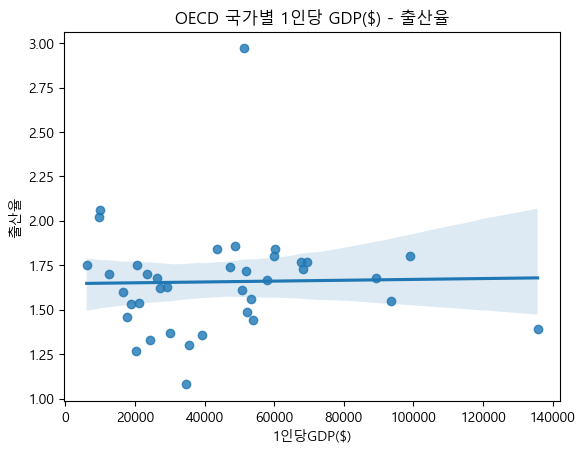

In [12]:
sns.regplot(x="1인당GDP($)", y="출산율", data=og, fit_reg=True)
plt.title("OECD 국가별 1인당 GDP($) - 출산율")
np.corrcoef(og["1인당GDP($)"], og["출산율"])[0,1]

In [13]:
# sns.boxplot(x="1인당GDP($)", y="출산율", data=og)

-0.12118633728967418

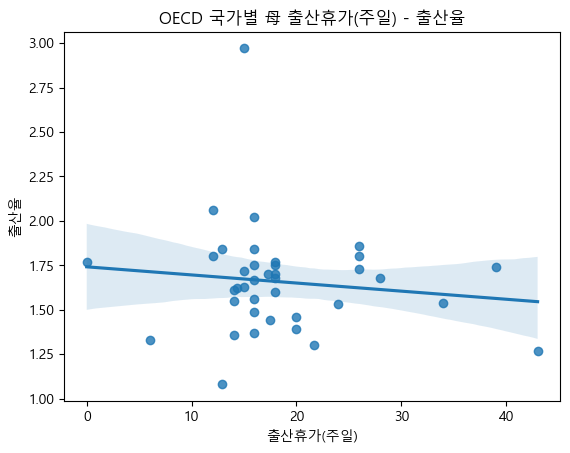

In [14]:
sns.regplot(x="출산휴가(주일)", y="출산율", data=og, fit_reg=True)
plt.title("OECD 국가별 母 출산휴가(주일) - 출산율")
np.corrcoef(og["출산휴가(주일)"], og["출산율"])[0,1]

-0.006383044391696587

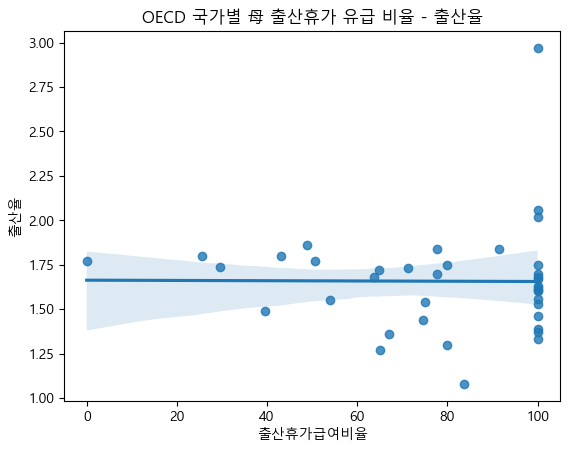

In [15]:
sns.regplot(x="출산휴가급여비율", y="출산율", data=og, fit_reg=True)
plt.title("OECD 국가별 母 출산휴가 유급 비율 - 출산율")
np.corrcoef(og["출산휴가급여비율"], og["출산율"])[0,1]

In [16]:
og_dropna = og.dropna()

-0.12700475549187232

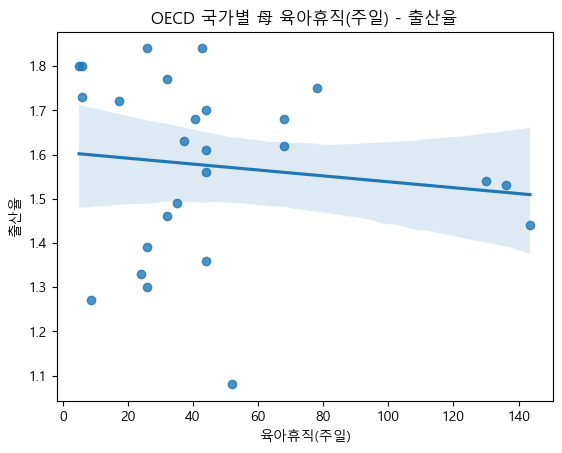

In [17]:
sns.regplot(x="육아휴직(주일)", y="출산율", data=og_dropna, fit_reg=True)
plt.title("OECD 국가별 母 육아휴직(주일) - 출산율")
np.corrcoef(og_dropna["육아휴직(주일)"], og_dropna["출산율"])[0,1]

0.010899806740200664

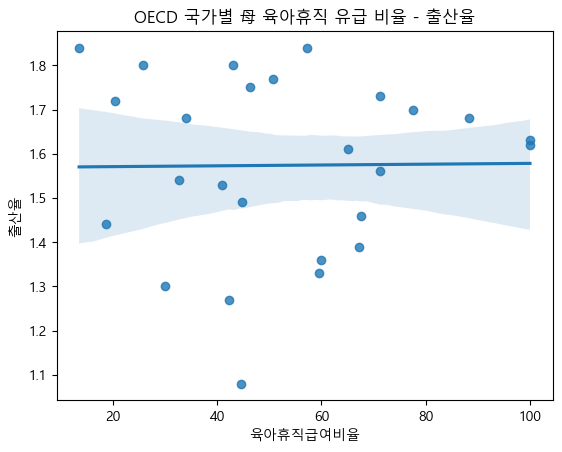

In [18]:
sns.regplot(x="육아휴직급여비율", y="출산율", data=og_dropna, fit_reg=True)
plt.title("OECD 국가별 母 육아휴직 유급 비율 - 출산율")
np.corrcoef(og_dropna["육아휴직급여비율"], og_dropna["출산율"])[0,1]

In [19]:
### 첫출산ㄴ나이 - 출산율


-0.4048755664676214

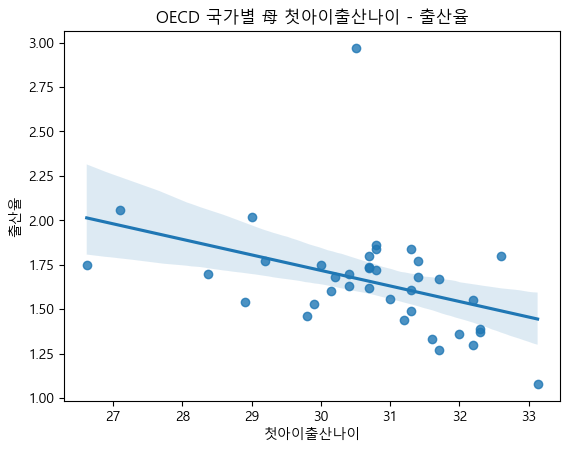

In [20]:
sns.regplot(x="첫아이출산나이", y="출산율", data=og, fit_reg=True)
plt.title("OECD 국가별 母 첫아이출산나이 - 출산율")
np.corrcoef(og["첫아이출산나이"], og["출산율"])[0,1]

In [21]:
aaa = og.groupby("대륙")["출산율"].mean()
aaa

대륙
동아시아/동남아시아      1.220000
라틴아메리카/카리브제도    1.777500
북아메리카           1.630000
북아프리카/서아시아      2.495000
오세아니아           1.830000
유럽              1.596923
Name: 출산율, dtype: float64

In [22]:
# aaa.plot(kind="bar")
# plt.xticks(rotation = -45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '북아프리카/서아시아'),
  Text(1, 0, '라틴아메리카/카리브제도'),
  Text(2, 0, '오세아니아'),
  Text(3, 0, '유럽'),
  Text(4, 0, '북아메리카'),
  Text(5, 0, '동아시아/동남아시아')])

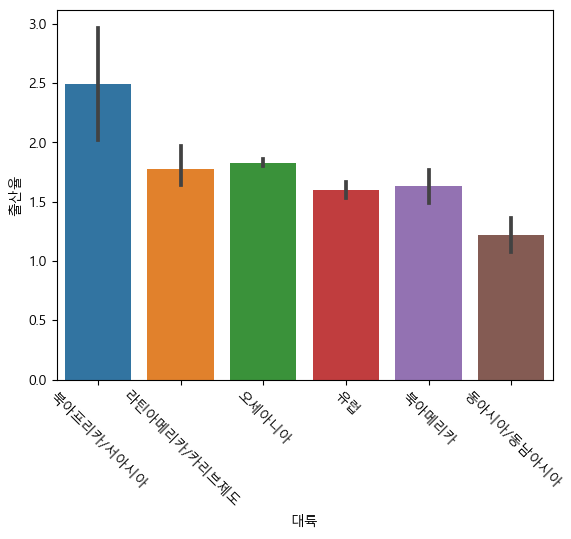

In [23]:
sns.barplot(x="대륙", y="출산율", data=og)
plt.xticks(rotation = -45)

## OECD 가입국 (한국, 이스라엘 제외)

In [24]:
og1 = og[1:37]
og1.head()

,대륙,국가,1인당GDP($),출산율,출산휴가(주일),출산휴가급여비율,육아휴직(주일),육아휴직급여비율,첫아이출산나이,보육비비율
1,라틴아메리카/카리브제도,멕시코,9926,2.06,12.000000,100.000000,NaN,NaN,27.105889,NaN
2,북아프리카/서아시아,튀르키예,9587,2.02,16.000000,100.000000,NaN,NaN,29.000000,4.0
3,오세아니아,뉴질랜드,48802,1.86,26.000000,48.929376,NaN,NaN,30.800000,NaN
4,유럽,프랑스,43519,1.84,16.000000,91.413456,26.000000,13.498988,30.800000,9.0
5,유럽,스웨덴,60239,1.84,12.857143,77.600000,42.857143,57.227432,31.300000,5.0


-0.040732610723864485

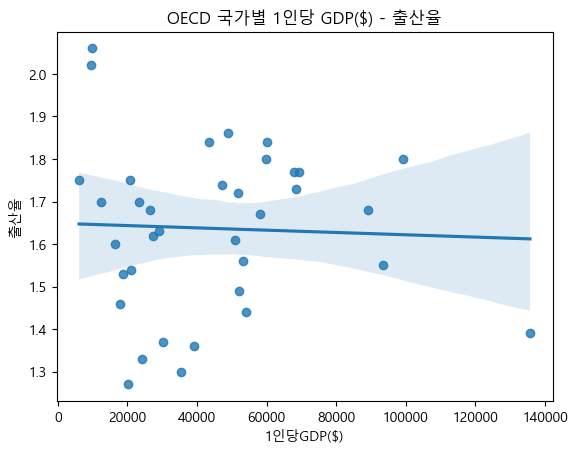

In [25]:
sns.regplot(x="1인당GDP($)", y="출산율", data=og1, fit_reg=True)
plt.title("OECD 국가별 1인당 GDP($) - 출산율")
np.corrcoef(og1["1인당GDP($)"], og1["출산율"])[0,1]

-0.1702611678728009

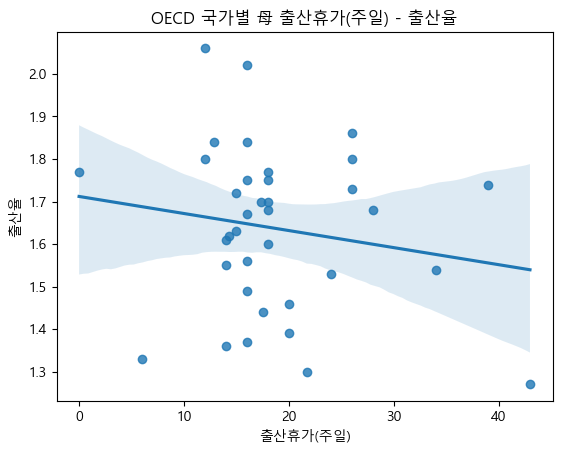

In [26]:
sns.regplot(x="출산휴가(주일)", y="출산율", data=og1, fit_reg=True)
plt.title("OECD 국가별 母 출산휴가(주일) - 출산율")
np.corrcoef(og1["출산휴가(주일)"], og1["출산율"])[0,1]

-0.15710231641324096

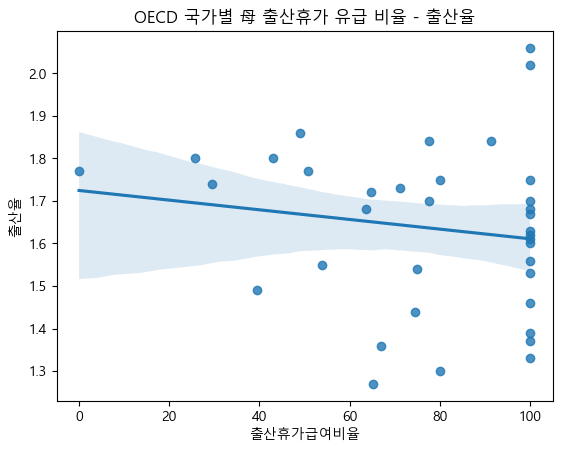

In [27]:
sns.regplot(x="출산휴가급여비율", y="출산율", data=og1, fit_reg=True)
plt.title("OECD 국가별 母 출산휴가 유급 비율 - 출산율")
np.corrcoef(og1["출산휴가급여비율"], og1["출산율"])[0,1]

In [28]:
og1_dropna = og1.dropna()

-0.13076849944368454

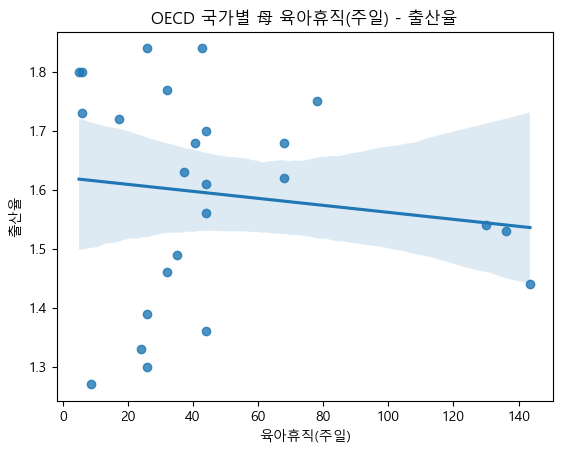

In [29]:
sns.regplot(x="육아휴직(주일)", y="출산율", data=og1_dropna, fit_reg=True)
plt.title("OECD 국가별 母 육아휴직(주일) - 출산율")
np.corrcoef(og1_dropna["육아휴직(주일)"], og1_dropna["출산율"])[0,1]

0.010899806740200664

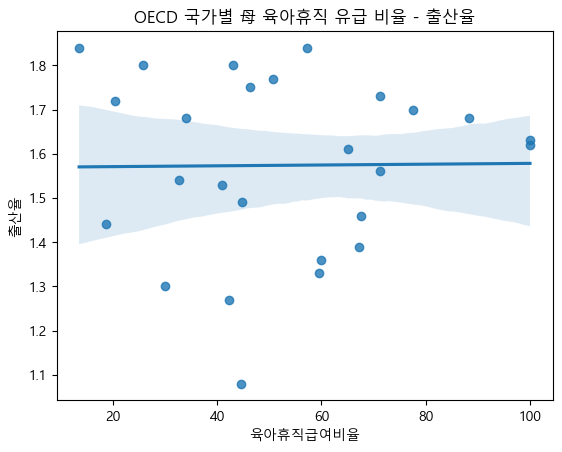

In [30]:
sns.regplot(x="육아휴직급여비율", y="출산율", data=og_dropna, fit_reg=True)
plt.title("OECD 국가별 母 육아휴직 유급 비율 - 출산율")
np.corrcoef(og_dropna["육아휴직급여비율"], og_dropna
            
            ["출산율"])[0,1]

-0.5095228523985237

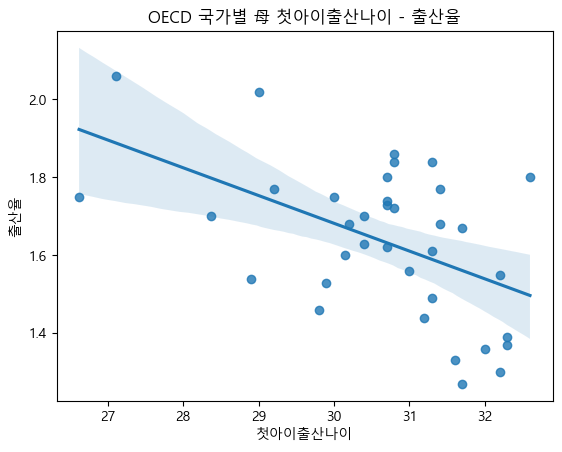

In [31]:
sns.regplot(x="첫아이출산나이", y="출산율", data=og1, fit_reg=True)
plt.title("OECD 국가별 母 첫아이출산나이 - 출산율")
np.corrcoef(og1["첫아이출산나이"], og1["출산율"])[0,1]

## OECD 가입국 대륙별 출산율

In [32]:
aaa = og1.groupby("대륙")["출산율"].mean()
aaa

대륙
동아시아/동남아시아      1.360000
라틴아메리카/카리브제도    1.777500
북아메리카           1.630000
북아프리카/서아시아      2.020000
오세아니아           1.830000
유럽              1.596923
Name: 출산율, dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '동아시아/동남아시아'),
  Text(1, 0, '라틴아메리카/카리브제도'),
  Text(2, 0, '북아메리카'),
  Text(3, 0, '북아프리카/서아시아'),
  Text(4, 0, '오세아니아'),
  Text(5, 0, '유럽')])

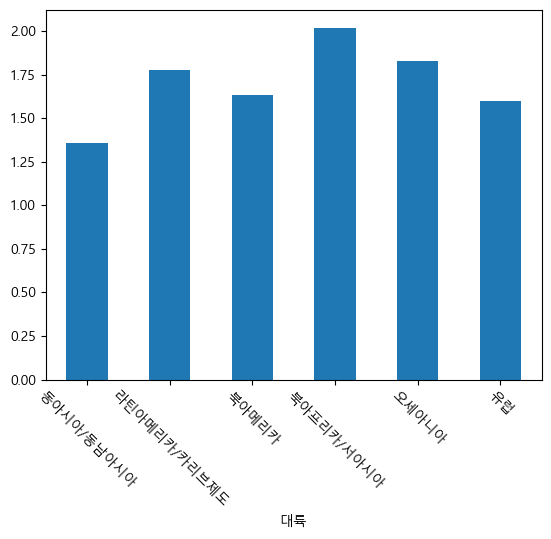

In [33]:
aaa.plot(kind="bar")
plt.xticks(rotation = -45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '라틴아메리카/카리브제도'),
  Text(1, 0, '북아프리카/서아시아'),
  Text(2, 0, '오세아니아'),
  Text(3, 0, '유럽'),
  Text(4, 0, '북아메리카'),
  Text(5, 0, '동아시아/동남아시아')])

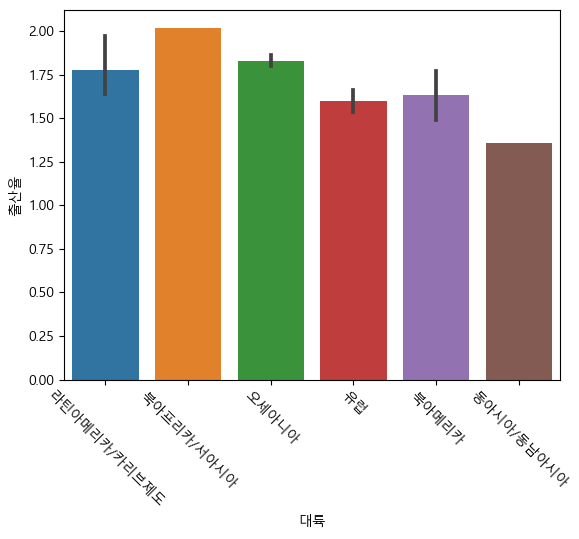

In [34]:
sns.barplot(x="대륙", y="출산율", data=og1)
plt.xticks(rotation = -45)

In [35]:
og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대륙         38 non-null     object 
 1   국가         38 non-null     object 
 2   1인당GDP($)  38 non-null     int64  
 3   출산율        38 non-null     float64
 4   출산휴가(주일)   38 non-null     float64
 5   출산휴가급여비율   38 non-null     float64
 6   육아휴직(주일)   27 non-null     float64
 7   육아휴직급여비율   28 non-null     float64
 8   첫아이출산나이    38 non-null     float64
 9   보육비비율      33 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.1+ KB


In [36]:
#################################
### 1인당 GDP
### 월평균 양육비용
og2 = og.dropna()

0.07320129524862165

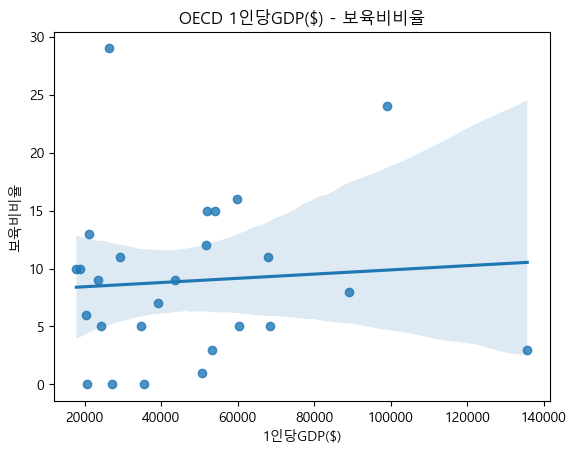

In [37]:
sns.regplot(x="1인당GDP($)", y="보육비비율", data=og2, fit_reg=True)
plt.title("OECD 1인당GDP($) - 보육비비율")
np.corrcoef(og2["1인당GDP($)"], og2["보육비비율"])[0,1]

0.2933328999954912

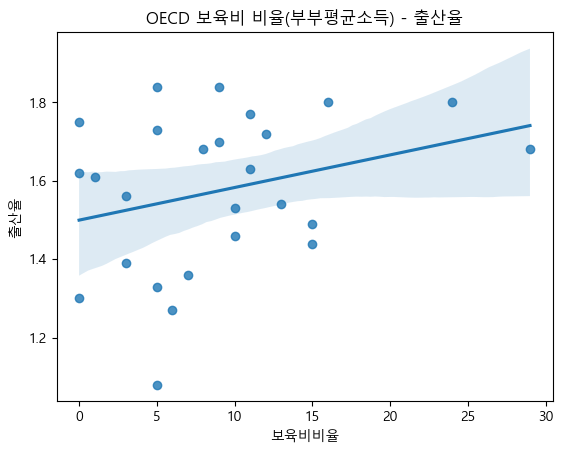

In [38]:
sns.regplot(x="보육비비율", y="출산율", data=og2, fit_reg=True)
plt.title("OECD 보육비 비율(부부평균소득) - 출산율")
np.corrcoef(og2["보육비비율"], og2["출산율"])[0,1]

## 전 세계 대륙별 합계출산율

In [39]:
wb = pd.read_excel("./data/세계_출산율.xlsx")

In [40]:
# wb

<AxesSubplot:xlabel='출산율', ylabel='대륙'>

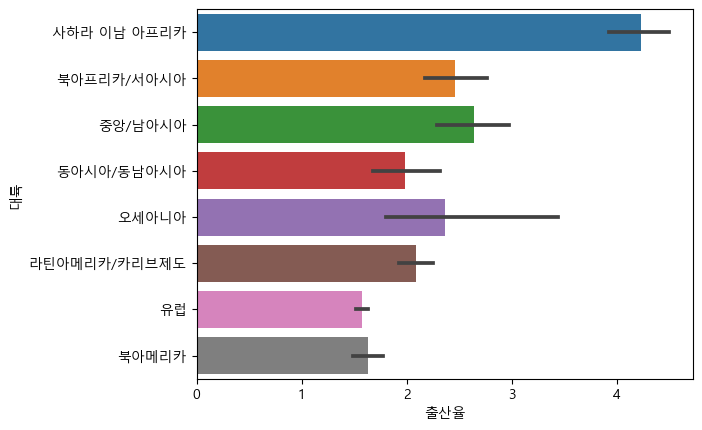

In [41]:
sns.barplot(x="출산율", y="대륙", data=wb)
# plt.xticks(rotation = -45)
# plt.grid()

<AxesSubplot:xlabel='출산율', ylabel='대륙'>

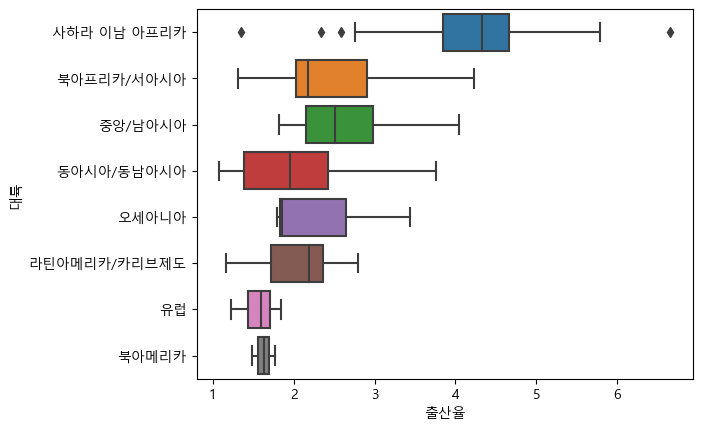

In [42]:
sns.boxplot(x="출산율", y="대륙", data=wb)

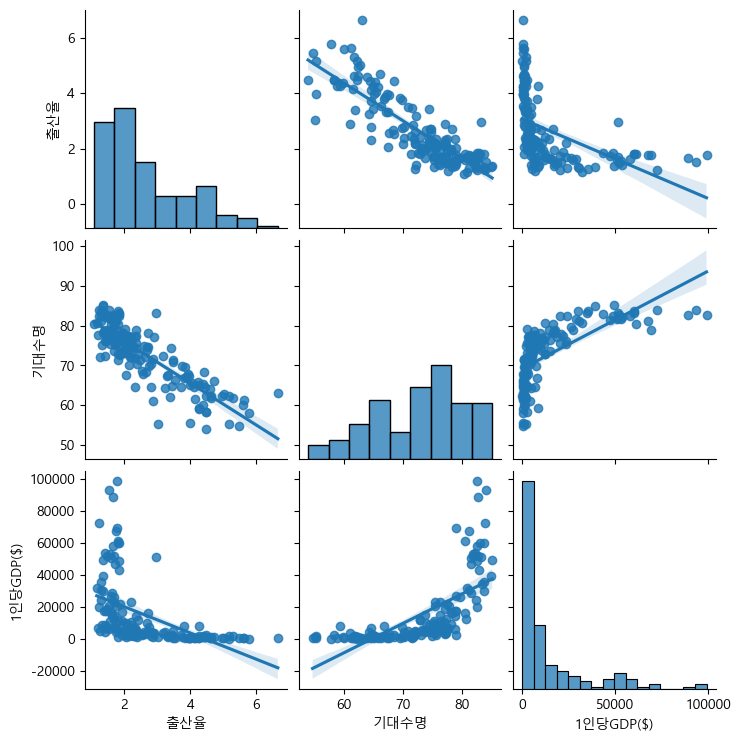

In [43]:
sns.pairplot(wb, kind="reg")

nan

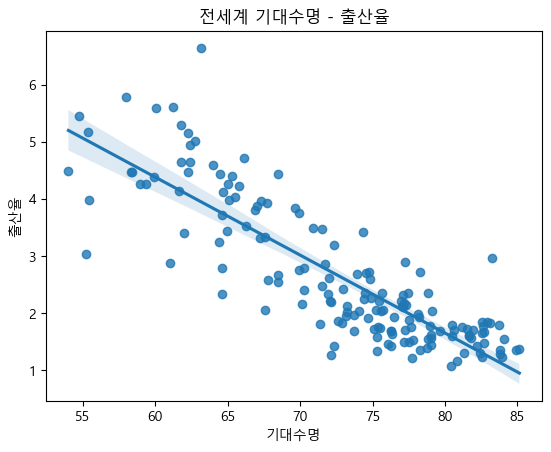

In [44]:
sns.regplot(x="기대수명", y="출산율", data=wb, fit_reg=True)
plt.title("전세계 기대수명 - 출산율")
np.corrcoef(wb["기대수명"], wb["출산율"])[0,1]

nan

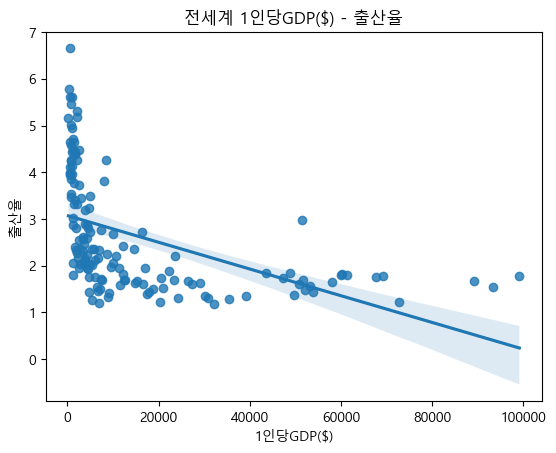

In [45]:
sns.regplot(x="1인당GDP($)", y="출산율", data=wb, fit_reg=True)
plt.title("전세계 1인당GDP($) - 출산율")
np.corrcoef(wb["1인당GDP($)"], wb["출산율"])[0,1]